In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


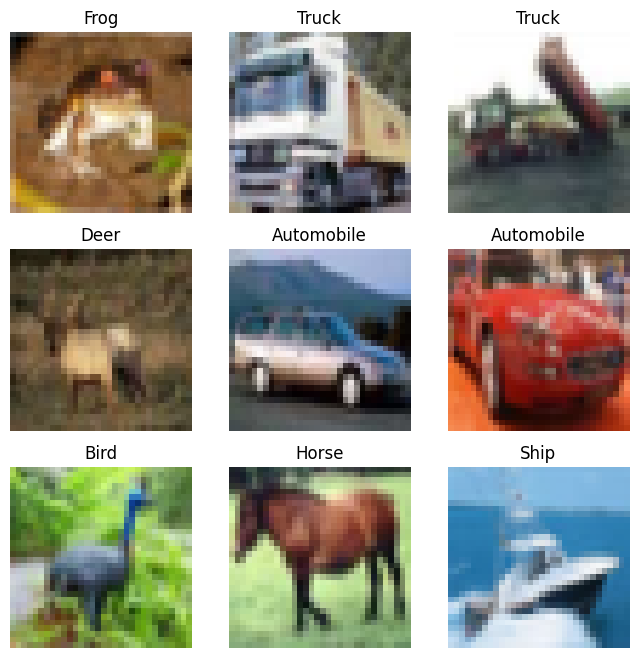

In [9]:
# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to plot sample images
def plot_cifar_images(images, labels, num_images=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Display 9 sample images
plot_cifar_images(X_train, y_train, num_images=9)


In [10]:
def show_pixel_values(index, dataset='train'):
    img = X_train[index] if dataset == 'train' else X_test[index]

    print(f"Pixel values for image {index} (Class: {class_names[y_train[index][0]]}):")
    print(img)

# Inspect pixel values of a specific image
show_pixel_values(10, dataset='train')

Pixel values for image 10 (Class: Deer):
[[[53 65 53]
  [54 63 52]
  [56 60 50]
  ...
  [47 51 50]
  [41 45 44]
  [24 28 27]]

 [[46 59 41]
  [53 62 45]
  [54 59 44]
  ...
  [42 46 45]
  [39 43 42]
  [28 32 31]]

 [[45 59 38]
  [50 60 41]
  [46 52 34]
  ...
  [38 42 41]
  [36 40 39]
  [29 33 32]]

 ...

 [[71 83 66]
  [74 83 66]
  [80 85 67]
  ...
  [51 54 33]
  [46 49 34]
  [49 50 41]]

 [[75 82 67]
  [79 85 69]
  [81 85 67]
  ...
  [61 65 41]
  [64 67 48]
  [48 50 41]]

 [[85 83 71]
  [85 84 71]
  [86 86 70]
  ...
  [61 65 39]
  [64 67 46]
  [49 50 41]]]


In [11]:
# Reshape images to 1D vectors (Flattening)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values (0-1)
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

print(f"Flattened training shape: {X_train_flat.shape}")


Flattened training shape: (50000, 3072)


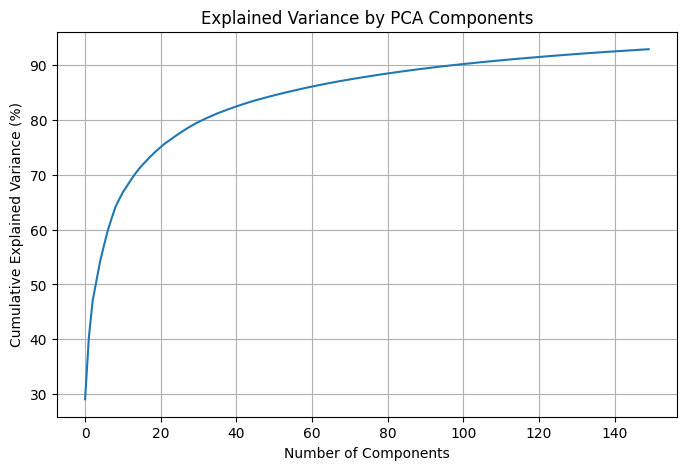

In [15]:
# Apply PCA to reduce to 100 components
pca = PCA(n_components=150)
X_pca = pca.fit_transform(X_train_flat)

# Visualizing explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


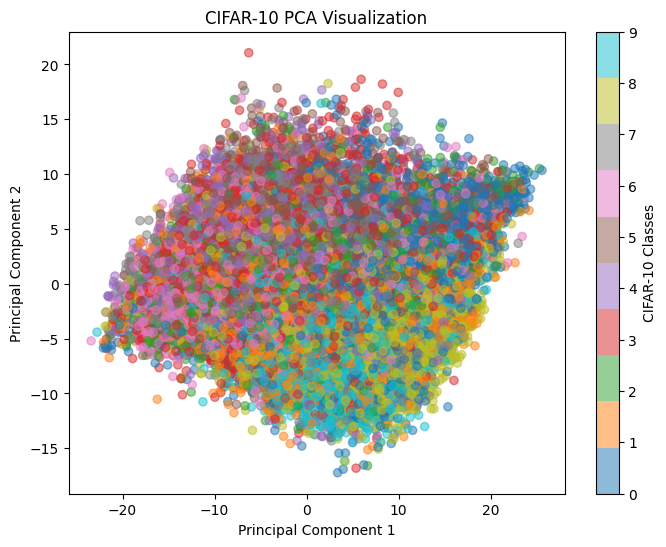

In [16]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.flatten(), cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label='CIFAR-10 Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('CIFAR-10 PCA Visualization')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10554684983180751..1.1156299421369824].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.044852738261164704..1.08355525194905].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05678180115741788..1.0965466789148786].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03919129830103707..0.9365761383796298].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09562799153970031..0.9964940385424264].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11324175792242452..0.9862418900814441].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020108604575277744..0.9432443384105329].
Clipping input dat

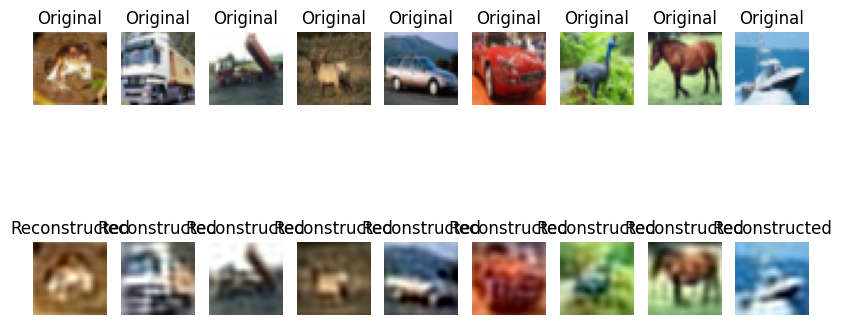

In [17]:
# Reconstruct images using inverse PCA transform
reconstructed = pca.inverse_transform(X_pca[:9])

# Reshape to original shape
reconstructed_images = reconstructed.reshape(-1, 32, 32, 3)

# Visualizing original and reconstructed images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(2, 9, i + 1)
    plt.imshow(X_train[i])
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 9, i + 10)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()
